# Un peu de morphologie mathématique !
Une ligne que l'on dilate pour obtenir un polygone (cela peut représenter une rivière modélisée par une ligne qui par la ligne "au milieu").
Puis on reprend ce polygone qu'on érode...

In [71]:
# chargement de shapely
import shapely
print(shapely.__version__)
from shapely.geometry import LineString

1.8.0


In [72]:
# chargement de matplotlib.pyplot
import matplotlib
import matplotlib.pyplot as plt
print(matplotlib.__version__)

3.5.0


In [73]:
!pip install descartes

In [74]:
from descartes.patch import PolygonPatch

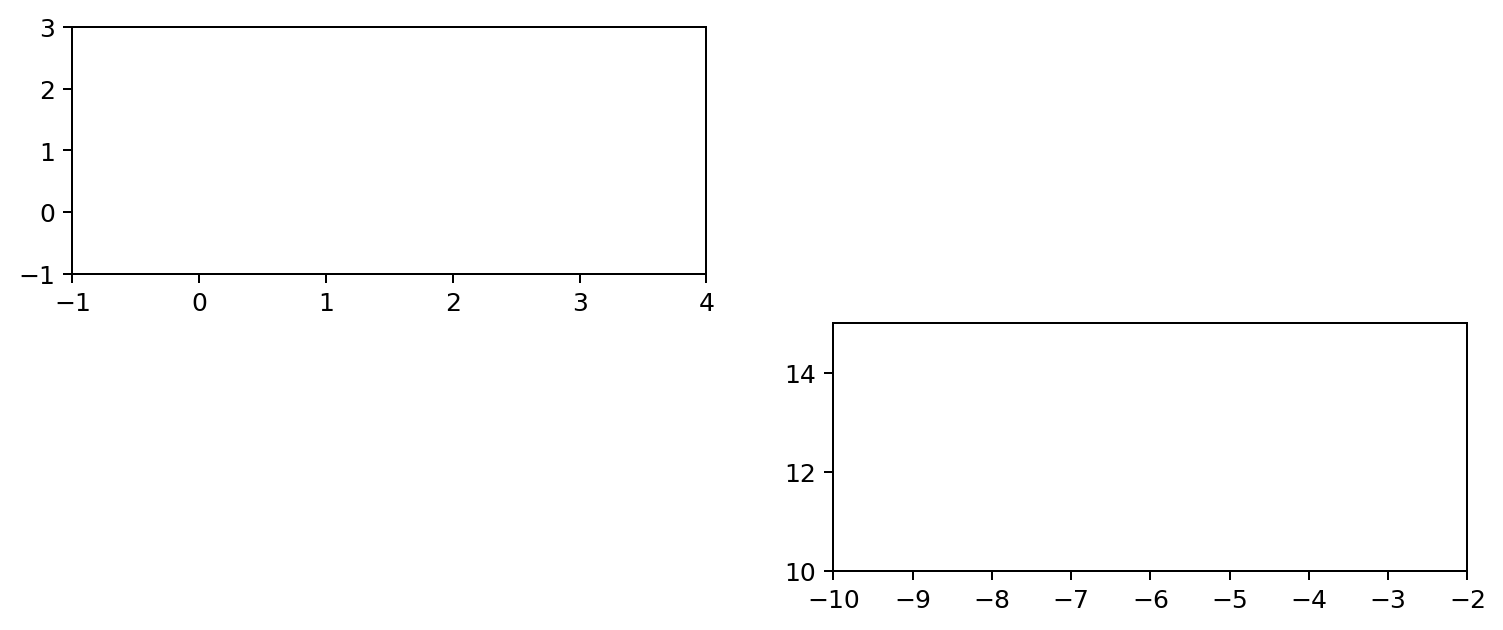

In [75]:
# une figure
fig = plt.figure(1, figsize=(10, 4), dpi=180)
# des axes
ax = fig.add_subplot(221)
bx = fig.add_subplot(224)
ax.set_xlim(-1, 4)
ax.set_ylim(-1, 3)
bx.set_xlim(-10, -2)
bx.set_ylim(10, 15)
# on affiche
ax.plot(label='dessin1')
bx.plot(label='dessin2')
#
plt.show()

/opt/anaconda3/envs/geo/lib/python3.8/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/opt/anaconda3/envs/geo/lib/python3.8/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


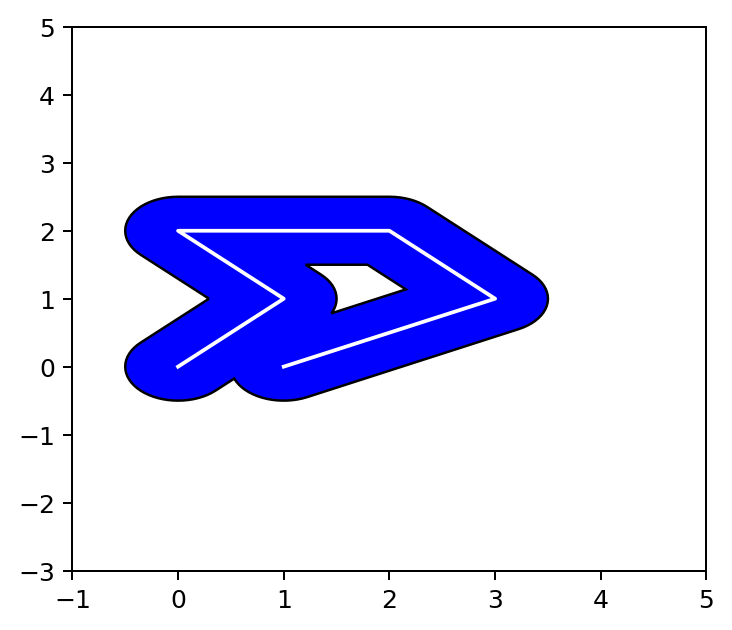

In [76]:
# une figure
fig = plt.figure(1, figsize=(10, 4), dpi=180)
# des axes
ax = fig.add_subplot(121, label='dessinLigne')

# Plot 1: dilating a line
ligne = LineString([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
# une dilatation (morpho math!)
dilated = ligne.buffer(0.5)

x, y = ligne.xy
ax.plot(x, y, label='dessinLigneDilaté', color='#ffffff')

patch1 = PolygonPatch(dilated, facecolor='#0000ff', edgecolor='#000000')
ax.add_patch(patch1)
ax.set_xlim(-1, 5)
ax.set_ylim(-3, 5)

plt.show()

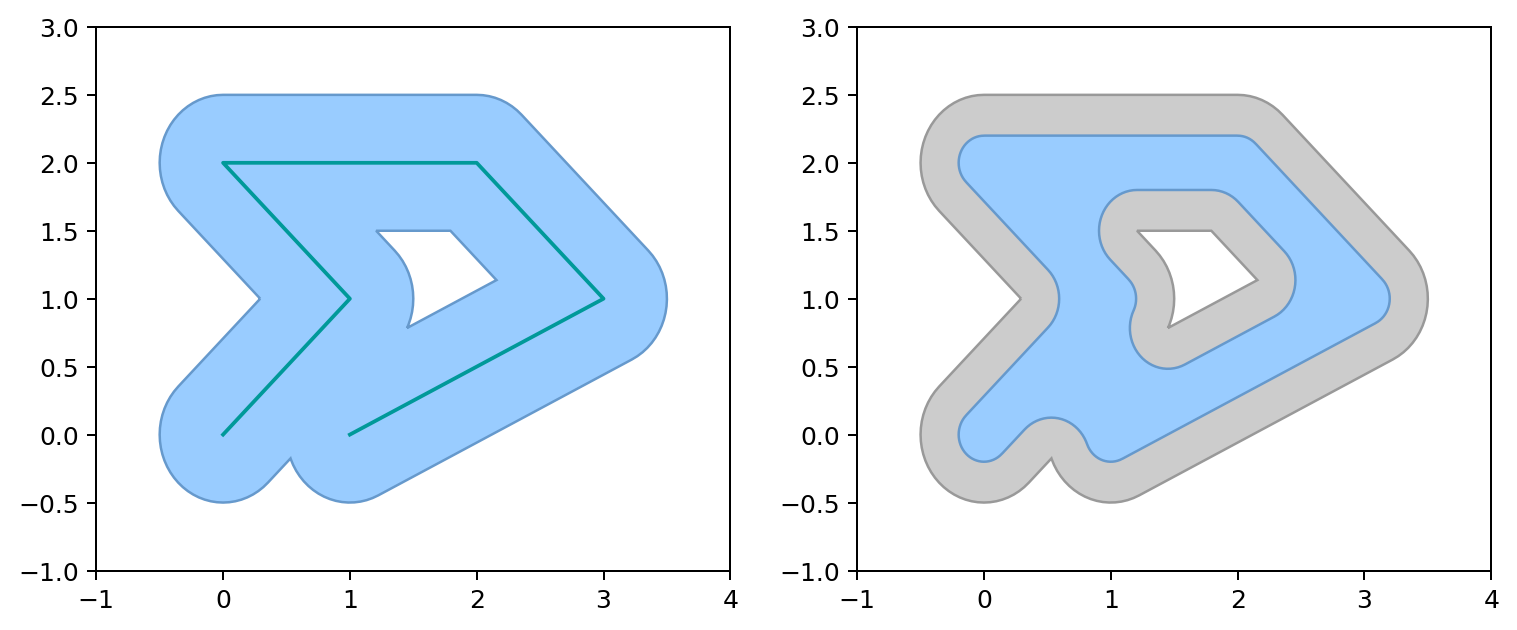

In [77]:
# une figure
fig = plt.figure(1, figsize=(10, 4), dpi=180)
# des axes
ax = fig.add_subplot(121, label='dessinLigne')

# Plot 1: dilating a line
line = LineString([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
# une dilatation (morpho math!)
#-----------------------------
dilatation = line.buffer(0.5)
#-----------------------------
patch1 = PolygonPatch(dilatation, facecolor='#99ccff', edgecolor='#6699cc')
ax.add_patch(patch1)
x, y = line.xy
# print(type(x)) pour vérifier
ax.plot(x, y, label='dessinLigneDilaté', color='#009999')
ax.set_xlim(-1, 4)
ax.set_ylim(-1, 3)

# Plot 2: erosion du polygon de la figure 1 
ax = fig.add_subplot(122, label='DessinLigneérodée')
patch2a = PolygonPatch(dilated, facecolor='#cccccc', edgecolor='#999999')
ax.add_patch(patch2a)
#-----------------------------
erosion = dilatation.buffer(-0.3)
#-----------------------------
patch2b = PolygonPatch(erosion, facecolor='#99ccff', edgecolor='#6699cc')
ax.add_patch(patch2b)
ax.set_xlim(-1, 4)
ax.set_ylim(-1, 3)
#
plt.show()

In [78]:
x = shapely.geometry.Point(0,0)

In [79]:
print(type(x))

<class 'shapely.geometry.point.Point'>


In [80]:
buf_x = x.buffer(0.8)

In [81]:
print(type(buf_x))

<class 'shapely.geometry.polygon.Polygon'>


# données vectorielles géospatiales avec Python


In [82]:
import geopandas
import shapely

Créer un dossier pour les données
+ paris_quartiers.geojson
+ paris_stations_velo.geojson

In [83]:
import os

In [84]:
quartiers = geopandas.read_file(os.path.join("myfolder","paris_quartiers.geojson")).to_crs(epsg=2154)

In [85]:
stations_velo = geopandas.read_file(os.path.join("dataParis","paris_bike_stations_mercator.gpkg")).to_crs(epsg=2154)

In [86]:
type(quartiers)

geopandas.geodataframe.GeoDataFrame

In [87]:
quartiers.head()

,id,district_name,population,geometry
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((651908.563 6861756.318, 651908.510 6..."
1,2,Halles,8984,"POLYGON ((652264.717 6862479.030, 652178.752 6..."
2,3,Palais-Royal,3195,"POLYGON ((651539.853 6862658.479, 651514.121 6..."
3,4,Place-Vendôme,3044,"POLYGON ((650990.707 6862971.961, 650946.460 6..."
4,5,Gaillon,1345,"POLYGON ((651314.531 6863309.339, 651280.525 6..."


In [88]:
quartiers.shape  # pour connaitre le nmbre d'enregistrement

(80, 4)

In [89]:
stations_velo.head()

,name,bike_stands,available_bikes,geometry
0,14002 - RASPAIL QUINET,44,4,POINT (650791.111 6860114.328)
1,20503 - COURS DE VINCENNES PYRÉNÉES,21,3,POINT (656402.183 6861017.443)
2,20011 - PYRÉNÉES-DAGORNO,21,0,POINT (656354.481 6861882.518)
3,31008 - VINCENNES (MONTREUIL),56,0,POINT (658718.855 6862109.911)
4,43006 - MINIMES (VINCENNES),28,27,POINT (658223.433 6860310.369)


<AxesSubplot:>

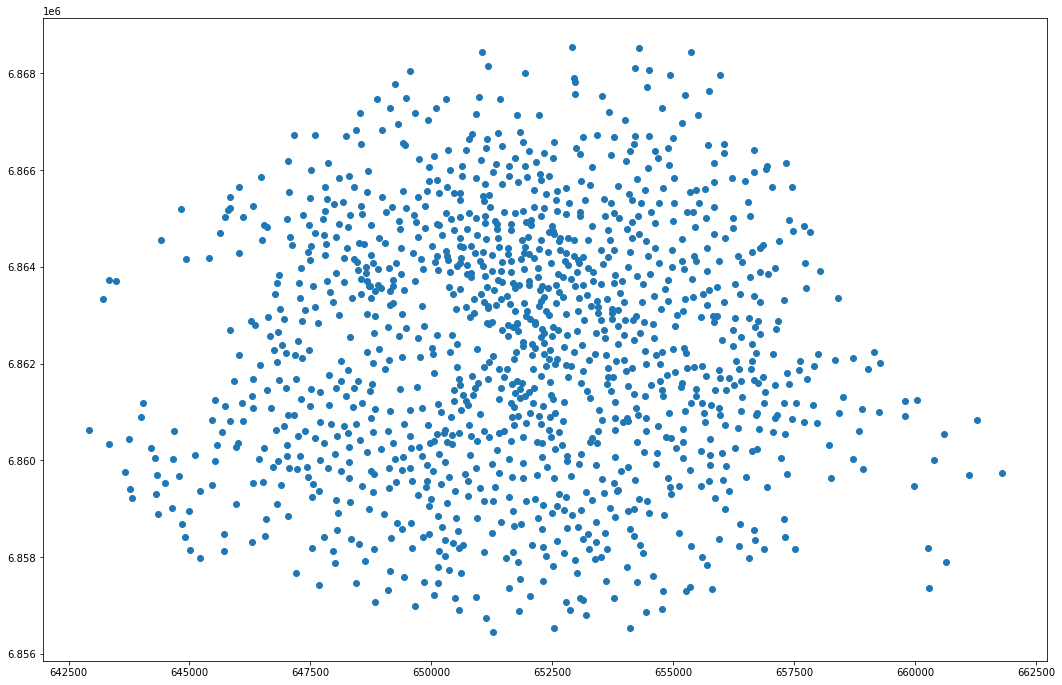

In [90]:
stations_velo.plot(figsize=(18,12))

HTTPError: Tile URL resulted in a 404 error. Double-check your tile url:
https://stamen-tiles-a.a.ssl.fastly.net/terrain/14/8454/5387.png

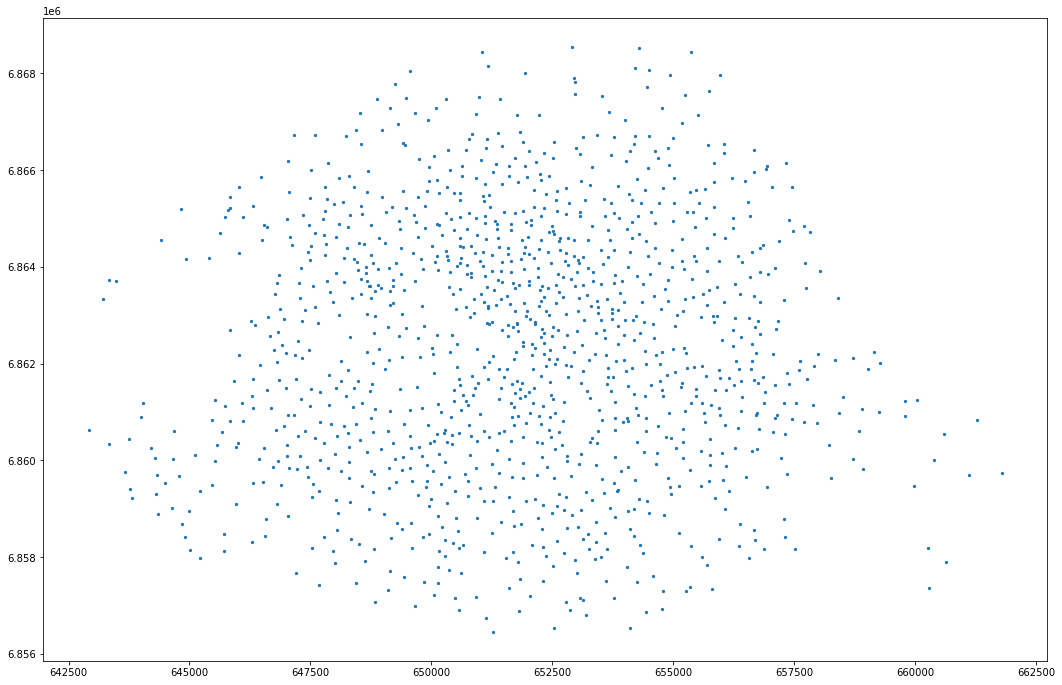

In [92]:
import contextily
ax = stations_velo.plot(figsize=(18,12), markersize=5)
contextily.add_basemap(ax, url=contextily.providers.OpenStreetMap)
contextily.add_basemap(ax, zoom=13)

In [94]:
stations_velo.columns

Index(['name', 'bike_stands', 'available_bikes', 'geometry'], dtype='object')

<AxesSubplot:>

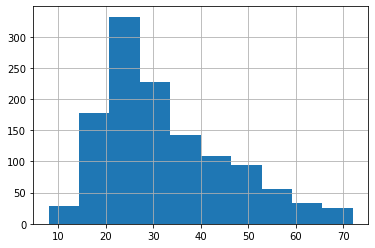

In [95]:
stations_velo['bike_stands'].hist()

AttributeError: 'Line2D' object has no property 'column'

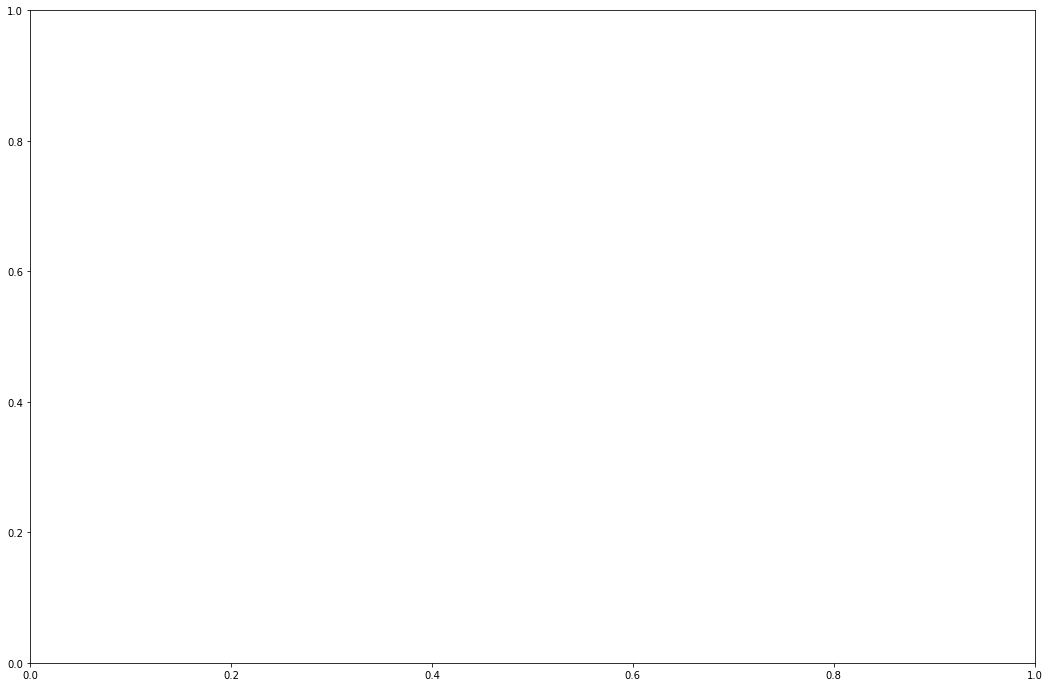

In [100]:
from sqlalchemy import column

stations_velo['available_bikes'].plot(figsize=(18,12), column='available_bikes', legend=True)